# EDA

Scripts consist of two components- 
#### action 
and
#### dialogue
Analyzing just the transcript rather than the whole script allows us to focus on the sentiment of dialogues (and therefore, the characters) rather than relying on cues provided by action (i.e., screen direction).

In this notebook, the transcripts of the pilot (i.e., first) episodes of 10 English TV shows of the 'workplace comedy' genre are analyzed to observe the styles across shows and identify considerably similar/different shows. Some of the top shows in this genre that were released between 2001 and 2016 were included in the analysis.

Note 1: Although web scraping to obtain these scripts was attempted initially, the non-uniformity of data (text data vs. data needing OCR) across scripts and lack of availability from a single source prevented a streamlined implementation.
The transcripts were obtained as scripts from various sources and the "action" components were manually omitted to ensure "dialogue" presence alone.

In [1]:
#For transcript
shows=['30 rock','B99','Its always sunny','Mindy project','Parks and rec','The office','Scrubs','Silicon valley','Superstore','Veep']

## Storing scripts from text files into a dictionary
To work on the script for each show, a dictionary with the key as show name and value as the text from the script's text file is created. Initial data cleaning includes eliminating neline characters.

In [2]:
'''Want to automate extraction of text from text file so that we dont have to go file-wise'''
import re

my_dict = {}
for i, sh in enumerate(shows):
     #with open("pilots/" + sh + " .txt", "r", encoding="utf-8") as file:
    with open("pilots/" + sh + " transcript.txt", "r", encoding="utf-8") as file:
        text=file.read()
        #replace newline characters with space (because character name and dialogue shouldnt get fused together)
        text=text.replace("\n"," ")
        #replace weird quotation marks, ellipsis
        text = re.sub('[‘’“”…]', '', text)
        #save the script as value to corresponding show in the dictionary
        my_dict[sh]=text
        file.close()
         
my_dict.keys()  

dict_keys(['30 rock', 'B99', 'Its always sunny', 'Mindy project', 'Parks and rec', 'The office', 'Scrubs', 'Silicon valley', 'Superstore', 'Veep'])

In [3]:
# We are going to change the individual sentence-wise scripts to key: show name, value: script in string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ''.join(str(list_of_text)) #have to use str() otherwise errors in parsing text
    return combined_text

# Bind the contents of each script together and store combined form into dictionary
data_combined = {key: [combine_text(value)] for (key, value) in my_dict.items()}
data_combined['The office']

['Michael: All right Jim. Your quarterlies look very good. How are things at the library? Jim: Oh, I told you. I couldn\'t close it. So... Michael: So you\'ve come to the master for guidance? Is this what you\'re saying, grasshopper? Jim: Actually, you called me in here, but yeah. Michael: All right. Well, let me show you how it\'s done. Michael: [on the phone] Yes, I\'d like to speak to your office manager, please. Yes, hello. This is Michael Scott. I am the Regional Manager of Dunder Mifflin Paper Products. Just wanted to talk to you manager-a-manger. [quick cut scene] All right. Done deal. Thank you very much, sir. You\'re a gentleman and a scholar. Oh, I\'m sorry. OK. I\'m sorry. My mistake. [hangs up] That was a woman I was talking to, so... She had a very low voice. Probably a smoker, so... [Clears throat] So that\'s the way it\'s done. Michael: I\'ve, uh, I\'ve been at Dunder Mifflin for 12 years, the last four as Regional Manager. If you want to come through here... See we have

In [4]:
# We can put the dictionary into a pandas dataframe
import pandas as pd
#for displaying below
pd.set_option('max_colwidth',500)
#transpose() allows saving the script for each show in row-wise fashion
data_df = pd.DataFrame.from_dict(data_combined).transpose()
#Name the column containing script
data_df.columns = ['Script']
data_df = data_df.sort_index()
data_df

,Script
30 rock,"MOM 1 I nursed Zach til he was 22 months... LISA Excuse me... MOM 2 Weren't you worried about nipple confusion? LISA Excuse me... MOM 1 No. He went right from my breast toa sippy cup. LISA That happened to me once. Can I get by? MOM 2 What about silicone nipple shields? MOM 1 If you had kids, you would not be laughing! LISA Whoa, whoa. Excuse me. There's a line, buddy. GUY There's two lines. LISA No, what? No. There's one line, we're in it. GUY I don't think so. LISA You don't think so? You..."
B99,"JAKE: This job is eating me alive. I can't breathe anymore. I spent all these years trying to be the good guy, the man in the white hat. I'm not becoming like them. I am them. AMY: Hey! What are you doing, weirdo? JAKE: I'm doing the best speech from Donnie Brasco. Or actually, ten of me are doing the best speech from Donnie Brasco. 'Sup? AMY: Get it together, man. Okay? AMY: So the store was hit about two hours ago. They took mostly tablets, laptops, and cameras. JAKE: Sorry. A..."
Its always sunny,"DENNIS Another big night, fellas. One Hundred eighty four dollars and sixty-seven cents. MAC Jesus Christ. CHARLIE On a Thursday night? DENNIS And our mortgage is due in two weeks. MAC Didn't we just pay that goddamn thing like a week ago? DENNIS Yes, Mac. And a week ago we were three weeks late. CHARLIE What are we gonna do? DENNIS I don't know, Charlie. But, then again, I don't know why I got into business with you boners in the first place, so I'm probably not the right person to ask. MAC..."
Mindy project,"Mindy: You have an idea of how your life is going to turn out. When I was a kid, all I did was watch romantic comedies in our living room while I did my homework. [Along with TV] ""I'll have what she's having."" Some coffee or, you know, drinks? Mindy: In High School, Tom Hanks was my first boyfriend. ""For as long as we both shall live."" Mindy: In college, everything changed. No supervision, total freedom. I could watch romantic comedies whenever I wanted to. ""I'm just a girl standing in front..."
Parks and rec,"LESLIE (V.0.) I love politics. I've always loved politics. ""The game."" LESLIE (CONT'D) Some people say that politics is show business for ugly people. I disagree. It's show business for real people -- people whose talents aren't dancing and singing, but rather talking and talking. LESLIE (V.0.) I just...I love the majesty of the political system. I live for it. I would say that my greatest dream is to be elected President of the United States of America. LESLIE My name is Les..."
Scrubs,"J.D (V.0.) Since I was eleven years old, I've been able to sleep through anything. Storms, earthquakes, my girlfriend yelling at me to ""Open the door or we're through, you name it. J.D (V.0.) Last night I didn't sleep. I guess I get a little goofy when I'm nervous. You see, today isn't just any other day.. It's my first day. I'm the man. J.D (V.0.) And four years of pre-med, four years of med school, and hundreds of thousands of dollars in unpaid loans have finally made me realize one impo..."
Silicon valley,"BIG HEAD Hey, man, some guys from Zynga are throwing an all-night Perplexus tourney. Maybe we can find some Stanford kids to hustle. THOMAS Cant. BIG HEAD Goddamn, Thomas, thats a buttload of code. JIAN YANG Sheee-it, mother fucker you can like buy compression software. You dont have to fucking write that shit. You can buy that shit! BIG HEAD Or download a bootleg. THOMAS None of that CodeAcademy crap for my web site. The whole idea of Pied Piper is based on melody recognition..."
Superstore,"Narrator: The American superstore. One-stop shopping for everything you could ever want or need. Do you want to be thinner? Fatter? Happier? Sadder? Are you looking for friendship? Or solitude? Or even love? Amy: That's actually a cubic zirconia knockoff. It's called PlastiClear. Bo: What happened to the $8 ones? Amy: We're all sold out of those, sorry. But this one's only $2 more. Bo: I get it. You advertise the cheap jew

## Cleaning text
We apply text cleaning once the data is in the dataframe format.

In [5]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [6]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.Script.apply(round1))
data_clean

,Script
30 rock,mom i nursed zach til he was months lisa excuse me mom werent you worried about nipple confusion lisa excuse me mom no he went right from my breast toa sippy cup lisa that happened to me once can i get by mom what about silicone nipple shields mom if you had kids you would not be laughing lisa whoa whoa excuse me theres a line buddy guy theres two lines lisa no what no theres one line were in it guy i dont think so lisa you dont think so you think theres two lines and we all chose to ...
B99,jake this job is eating me alive i cant breathe anymore i spent all these years trying to be the good guy the man in the white hat im not becoming like them i am them amy hey what are you doing weirdo jake im doing the best speech from donnie brasco or actually ten of me are doing the best speech from donnie brasco sup amy get it together man okay amy so the store was hit about two hours ago they took mostly tablets laptops and cameras jake sorry amy id like a list of all your e...
Its always sunny,dennis another big night fellas one hundred eighty four dollars and sixtyseven cents mac jesus christ charlie on a thursday night dennis and our mortgage is due in two weeks mac didnt we just pay that goddamn thing like a week ago dennis yes mac and a week ago we were three weeks late charlie what are we gonna do dennis i dont know charlie but then again i dont know why i got into business with you boners in the first place so im probably not the right person to ask mac dennis take it easy d...
Mindy project,mindy you have an idea of how your life is going to turn out when i was a kid all i did was watch romantic comedies in our living room while i did my homework along with tv ill have what shes having some coffee or you know drinks mindy in high school tom hanks was my first boyfriend for as long as we both shall live mindy in college everything changed no supervision total freedom i could watch romantic comedies whenever i wanted to im just a girl standing in front of a boy asking him to love...
Parks and rec,leslie i love politics ive always loved politics the game leslie contd some people say that politics is show business for ugly people i disagree its show business for real people people whose talents arent dancing and singing but rather talking and talking leslie i justi love the majesty of the political system i live for it i would say that my greatest dream is to be elected president of the united states of america leslie my name is leslie knope and i am the deputy chai...
Scrubs,jd since i was eleven years old ive been able to sleep through anything storms earthquakes my girlfriend yelling at me to open the door or were through you name it jd last night i didnt sleep i guess i get a little goofy when im nervous you see today isnt just any other day its my first day im the man jd and four years of premed four years of med school and hundreds of thousands of dollars in unpaid loans have finally made me realize one important thing nurse kearney good could you go ...
Silicon valley,big head hey man some guys from zynga are throwing an allnight perplexus tourney maybe we can find some stanford kids to hustle thomas cant big head goddamn thomas thats a buttload of code jian yang sheeeit mother fucker you can like buy compression software you dont have to fucking write that shit you can buy that shit big head or download a bootleg thomas none of that codeacademy crap for my web site the whole idea of pied piper is based on melody recognition if it doesnt w...
Superstore,narrator the american superstore onestop shopping for everything you could ever want or need do you want to be thinner fatter happier sadder are you looking for friendship or solitude or even love amy thats actually a cubic zirconia knockoff its called plasticlear bo what happened to the ones amy were all sold out of those sorry but this ones only more bo i get it you advertise the cheap jewelry to get the suckers in the door then you push the expensive stuff 

## Additional Data Cleaning
Observing the data after initial cleaning reveals scope for additional cleaning, such as replacing dollar signs and removing any pieces of text between round or square brackets (which are usually used to indicate the action component in scripts, whereas we want to focus on the dialogue alone.)

In [7]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text) #remove double-quotation marks
    text = re.sub('\n', '', text) #remove line breaks
    '''Text within 2 dollar signs renders in italics. 
    To avoid this, replacing symbol with word 'dollar'''
    text = re.sub('\$', 'dollar ', text)
    text = re.sub("[\(\[].*?[\)\]]", "", text) #remove text within round/square brackets
    return text

round2 = lambda x: clean_text_round2(x)

In [8]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.Script.apply(round2))
data_clean

,Script
30 rock,mom i nursed zach til he was months lisa excuse me mom werent you worried about nipple confusion lisa excuse me mom no he went right from my breast toa sippy cup lisa that happened to me once can i get by mom what about silicone nipple shields mom if you had kids you would not be laughing lisa whoa whoa excuse me theres a line buddy guy theres two lines lisa no what no theres one line were in it guy i dont think so lisa you dont think so you think theres two lines and we all chose to ...
B99,jake this job is eating me alive i cant breathe anymore i spent all these years trying to be the good guy the man in the white hat im not becoming like them i am them amy hey what are you doing weirdo jake im doing the best speech from donnie brasco or actually ten of me are doing the best speech from donnie brasco sup amy get it together man okay amy so the store was hit about two hours ago they took mostly tablets laptops and cameras jake sorry amy id like a list of all your e...
Its always sunny,dennis another big night fellas one hundred eighty four dollars and sixtyseven cents mac jesus christ charlie on a thursday night dennis and our mortgage is due in two weeks mac didnt we just pay that goddamn thing like a week ago dennis yes mac and a week ago we were three weeks late charlie what are we gonna do dennis i dont know charlie but then again i dont know why i got into business with you boners in the first place so im probably not the right person to ask mac dennis take it easy d...
Mindy project,mindy you have an idea of how your life is going to turn out when i was a kid all i did was watch romantic comedies in our living room while i did my homework along with tv ill have what shes having some coffee or you know drinks mindy in high school tom hanks was my first boyfriend for as long as we both shall live mindy in college everything changed no supervision total freedom i could watch romantic comedies whenever i wanted to im just a girl standing in front of a boy asking him to love...
Parks and rec,leslie i love politics ive always loved politics the game leslie contd some people say that politics is show business for ugly people i disagree its show business for real people people whose talents arent dancing and singing but rather talking and talking leslie i justi love the majesty of the political system i live for it i would say that my greatest dream is to be elected president of the united states of america leslie my name is leslie knope and i am the deputy chai...
Scrubs,jd since i was eleven years old ive been able to sleep through anything storms earthquakes my girlfriend yelling at me to open the door or were through you name it jd last night i didnt sleep i guess i get a little goofy when im nervous you see today isnt just any other day its my first day im the man jd and four years of premed four years of med school and hundreds of thousands of dollars in unpaid loans have finally made me realize one important thing nurse kearney good could you go ...
Silicon valley,big head hey man some guys from zynga are throwing an allnight perplexus tourney maybe we can find some stanford kids to hustle thomas cant big head goddamn thomas thats a buttload of code jian yang sheeeit mother fucker you can like buy compression software you dont have to fucking write that shit you can buy that shit big head or download a bootleg thomas none of that codeacademy crap for my web site the whole idea of pied piper is based on melody recognition if it doesnt w...
Superstore,narrator the american superstore onestop shopping for everything you could ever want or need do you want to be thinner fatter happier sadder are you looking for friendship or solitude or even love amy thats actually a cubic zirconia knockoff its called plasticlear bo what happened to the ones amy were all sold out of those sorry but this ones only more bo i get it you advertise the cheap jewelry to get the suckers in the door then you push the expensive stuff 

In [9]:
#Add a column with show names to original and cleaned dataframes for displaying in sentiment graph scatter plot
#This list has to be in alphabetical order because it gets stored that way during later analysis
#full_show_names=['30 Rock','Brooklyn Nine Nine','Brooklyn Nine Nine_Transcript_Only','Its Always Sunny in Philadelphia','The Mindy Project','Parks and Recreation','Party Down','Scrubs','Silicon Valley','Superstore','Superstore_Transcript_Only','The Office','Veep']
full_show_names=['30 Rock','Brooklyn Nine Nine','Its Always Sunny in Philadelphia','The Mindy Project','Parks and Recreation','Scrubs','Silicon valley','Superstore','The Office','Veep']
data_clean['Show_name']=full_show_names
data_clean

,Script,Show_name
30 rock,mom i nursed zach til he was months lisa excuse me mom werent you worried about nipple confusion lisa excuse me mom no he went right from my breast toa sippy cup lisa that happened to me once can i get by mom what about silicone nipple shields mom if you had kids you would not be laughing lisa whoa whoa excuse me theres a line buddy guy theres two lines lisa no what no theres one line were in it guy i dont think so lisa you dont think so you think theres two lines and we all chose to ...,30 Rock
B99,jake this job is eating me alive i cant breathe anymore i spent all these years trying to be the good guy the man in the white hat im not becoming like them i am them amy hey what are you doing weirdo jake im doing the best speech from donnie brasco or actually ten of me are doing the best speech from donnie brasco sup amy get it together man okay amy so the store was hit about two hours ago they took mostly tablets laptops and cameras jake sorry amy id like a list of all your e...,Brooklyn Nine Nine
Its always sunny,dennis another big night fellas one hundred eighty four dollars and sixtyseven cents mac jesus christ charlie on a thursday night dennis and our mortgage is due in two weeks mac didnt we just pay that goddamn thing like a week ago dennis yes mac and a week ago we were three weeks late charlie what are we gonna do dennis i dont know charlie but then again i dont know why i got into business with you boners in the first place so im probably not the right person to ask mac dennis take it easy d...,Its Always Sunny in Philadelphia
Mindy project,mindy you have an idea of how your life is going to turn out when i was a kid all i did was watch romantic comedies in our living room while i did my homework along with tv ill have what shes having some coffee or you know drinks mindy in high school tom hanks was my first boyfriend for as long as we both shall live mindy in college everything changed no supervision total freedom i could watch romantic comedies whenever i wanted to im just a girl standing in front of a boy asking him to love...,The Mindy Project
Parks and rec,leslie i love politics ive always loved politics the game leslie contd some people say that politics is show business for ugly people i disagree its show business for real people people whose talents arent dancing and singing but rather talking and talking leslie i justi love the majesty of the political system i live for it i would say that my greatest dream is to be elected president of the united states of america leslie my name is leslie knope and i am the deputy chai...,Parks and Recreation
Scrubs,jd since i was eleven years old ive been able to sleep through anything storms earthquakes my girlfriend yelling at me to open the door or were through you name it jd last night i didnt sleep i guess i get a little goofy when im nervous you see today isnt just any other day its my first day im the man jd and four years of premed four years of med school and hundreds of thousands of dollars in unpaid loans have finally made me realize one important thing nurse kearney good could you go ...,Scrubs
Silicon valley,big head hey man some guys from zynga are throwing an allnight perplexus tourney maybe we can find some stanford kids to hustle thomas cant big head goddamn thomas thats a buttload of code jian yang sheeeit mother fucker you can like buy compression software you dont have to fucking write that shit you can buy that shit big head or download a bootleg thomas none of that codeacademy crap for my web site the whole idea of pied piper is based on melody recognition if it doesnt w...,Silicon valley
Superstore,narrator the american superstore onestop shopping for everything you could ever want or need do you want to be thinner fatter happier sadder are you looking for friendship or solitude or even love amy thats actually a cubic zirconia knockoff its called plasticlear bo what happened to the ones amy were all sold out of those sorry bu

In [10]:
# Pickle the (original unedited) corpus
data_df.to_pickle("pickle/corpus.pkl")

In [11]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.Script)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index
data_dtm



,aaahm,aah,abandoned,abbey,abdul,abg,ability,able,abortion,abortions,...,zero,zeroes,zip,zips,zipup,zirconia,zithers,zone,zoned,zynga
30 rock,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Its always sunny,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mindy project,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Parks and rec,0,0,2,0,1,0,1,3,1,1,...,1,0,0,0,0,0,0,1,1,0
Scrubs,0,0,0,0,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
Silicon valley,0,0,0,0,0,0,0,1,0,0,...,0,2,1,0,0,0,1,0,0,1
Superstore,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
The office,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Veep,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Let's pickle the DTM made from the cleaned dataframe for later use
data_dtm.to_pickle("pickle/dtm.pkl")

In [13]:
# Let's also pickle the cleaned data and the CountVectorizer object
import pickle
data_clean.to_pickle('pickle/data_clean.pkl')
pickle.dump(cv, open("pickle/cv.pkl", "wb"))

In [14]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('pickle/dtm.pkl')
data = data.transpose()
data.head()

,30 rock,B99,Its always sunny,Mindy project,Parks and rec,Scrubs,Silicon valley,Superstore,The office,Veep
aaahm,0,0,0,0,0,0,0,0,0,1
aah,0,0,0,1,0,0,0,0,0,0
abandoned,0,0,0,0,2,0,0,0,0,0
abbey,0,0,0,1,0,0,0,0,0,0
abdul,0,0,0,0,1,0,0,0,0,0


# Obtaining frequencies of frequently occuring words

In [15]:
# Find the top 30 words in each show
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict


{'30 rock': [('lisa', 97),
  ('pete', 45),
  ('jack', 38),
  ('im', 36),
  ('jenna', 33),
  ('contd', 30),
  ('lawrence', 28),
  ('dont', 25),
  ('kenneth', 25),
  ('toofer', 24),
  ('josh', 22),
  ('frank', 22),
  ('like', 22),
  ('just', 18),
  ('know', 16),
  ('sarie', 14),
  ('youre', 13),
  ('want', 13),
  ('hey', 12),
  ('got', 11),
  ('thats', 11),
  ('yes', 10),
  ('right', 9),
  ('guy', 9),
  ('yeah', 9),
  ('okay', 9),
  ('gonna', 9),
  ('make', 9),
  ('jordan', 9),
  ('gary', 9)],
 'B99': [('jake', 51),
  ('holt', 33),
  ('im', 30),
  ('amy', 23),
  ('charles', 22),
  ('know', 22),
  ('terry', 22),
  ('captain', 21),
  ('good', 19),
  ('like', 18),
  ('detective', 18),
  ('yeah', 17),
  ('oh', 17),
  ('just', 17),
  ('okay', 17),
  ('ratko', 17),
  ('got', 17),
  ('gina', 15),
  ('thats', 15),
  ('right', 14),
  ('rosa', 14),
  ('youre', 13),
  ('dont', 13),
  ('man', 12),
  ('think', 11),
  ('sir', 11),
  ('hey', 11),
  ('new', 10),
  ('did', 10),
  ('hes', 10)],
 'Its alwa

In [16]:
# Print the top 15 words said in each show
for show, top_words in top_dict.items():
    print(show)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')


30 rock
lisa, pete, jack, im, jenna, contd, lawrence, dont, kenneth, toofer, josh, frank, like, just
---
B99
jake, holt, im, amy, charles, know, terry, captain, good, like, detective, yeah, oh, just
---
Its always sunny
mac, charlie, dennis, dee, sweet, terrell, dont, like, im, hey, know, just, janelle, dude
---
Mindy project
im, know, okay, just, like, dont, date, thats, oh, mindy, really, think, youre, gonna
---
Parks and rec
leslie, ann, tom, mark, im, like, ron, contd, pit, just, people, really, yes, park
---
Scrubs
jd, dr, elliot, im, turk, cox, just, know, kelso, dont, carla, youre, like, vo
---
Silicon valley
thomas, just, big, gavin, dont, im, head, like, erlich, gregory, know, peter, want, belson
---
Superstore
jonah, amy, im, cheyenne, like, know, dina, just, dont, glenn, right, okay, oh, garrett
---
The office
michael, pam, jim, dwight, just, yeah, im, ok, know, right, jan, going, dont, thats
---
Veep
selina, anna, gary, dan, jonah, im, mike, senator, like, hallowes, know, d

Notably, a lot of character names seem to be mentioned multiple times. This is because the transcripts contain character names before each dialogue. Hence, we'll try eliminating these words.
We could also use the names determined via SpaCy NER, but we know that those results arent as comprehensive in terms of covering all characters. Hence, we'll simply eliminate words (including character names) based on frequency of occurence and relevance to the context.

In [17]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each show
words = []
for show in data.columns:
    top = [word for (word, count) in top_dict[show]]
    for t in top:
        words.append(t)
        
words

['lisa',
 'pete',
 'jack',
 'im',
 'jenna',
 'contd',
 'lawrence',
 'dont',
 'kenneth',
 'toofer',
 'josh',
 'frank',
 'like',
 'just',
 'know',
 'sarie',
 'youre',
 'want',
 'hey',
 'got',
 'thats',
 'yes',
 'right',
 'guy',
 'yeah',
 'okay',
 'gonna',
 'make',
 'jordan',
 'gary',
 'jake',
 'holt',
 'im',
 'amy',
 'charles',
 'know',
 'terry',
 'captain',
 'good',
 'like',
 'detective',
 'yeah',
 'oh',
 'just',
 'okay',
 'ratko',
 'got',
 'gina',
 'thats',
 'right',
 'rosa',
 'youre',
 'dont',
 'man',
 'think',
 'sir',
 'hey',
 'new',
 'did',
 'hes',
 'mac',
 'charlie',
 'dennis',
 'dee',
 'sweet',
 'terrell',
 'dont',
 'like',
 'im',
 'hey',
 'know',
 'just',
 'janelle',
 'dude',
 'guys',
 'oh',
 'bar',
 'yeah',
 'think',
 'people',
 'guy',
 'black',
 'youre',
 'waitress',
 'gonna',
 'really',
 'gay',
 'nice',
 'thought',
 'night',
 'im',
 'know',
 'okay',
 'just',
 'like',
 'dont',
 'date',
 'thats',
 'oh',
 'mindy',
 'really',
 'think',
 'youre',
 'gonna',
 'sorry',
 'great',
 'loo

In [18]:
# Let's aggregate this list and identify the most common words along with how many scripts they occur in
Counter(words).most_common()

[('im', 10),
 ('dont', 10),
 ('like', 10),
 ('just', 10),
 ('know', 10),
 ('youre', 8),
 ('yeah', 8),
 ('want', 7),
 ('thats', 7),
 ('right', 7),
 ('hey', 6),
 ('think', 6),
 ('okay', 5),
 ('gonna', 5),
 ('good', 5),
 ('oh', 5),
 ('really', 5),
 ('going', 5),
 ('contd', 4),
 ('got', 4),
 ('yes', 4),
 ('guy', 4),
 ('sorry', 4),
 ('make', 3),
 ('man', 3),
 ('guys', 3),
 ('people', 3),
 ('look', 3),
 ('gary', 2),
 ('amy', 2),
 ('thank', 2),
 ('patient', 2),
 ('talking', 2),
 ('tell', 2),
 ('jonah', 2),
 ('need', 2),
 ('lisa', 1),
 ('pete', 1),
 ('jack', 1),
 ('jenna', 1),
 ('lawrence', 1),
 ('kenneth', 1),
 ('toofer', 1),
 ('josh', 1),
 ('frank', 1),
 ('sarie', 1),
 ('jordan', 1),
 ('jake', 1),
 ('holt', 1),
 ('charles', 1),
 ('terry', 1),
 ('captain', 1),
 ('detective', 1),
 ('ratko', 1),
 ('gina', 1),
 ('rosa', 1),
 ('sir', 1),
 ('new', 1),
 ('did', 1),
 ('hes', 1),
 ('mac', 1),
 ('charlie', 1),
 ('dennis', 1),
 ('dee', 1),
 ('sweet', 1),
 ('terrell', 1),
 ('janelle', 1),
 ('dude', 1),


In [19]:
#add_stop_words = [word for word, count in Counter(words).most_common() if count > 5]
add_stop_words = [word for word, count in Counter(words).most_common()]
add_stop_words
#trying to remove a few more prominent words that are contextually irrelevant
add_stop_words.extend(('mom','little','say','let','stanley','roy','god'))

#PICKLING THE LIST OF STOP WORDS FOR USE IN ANOTHER NOTEBOOK
import pickle
pickle.dump(add_stop_words, open("pickle/stop_list.pkl", "wb"))

In [20]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('pickle/data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.Script)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("pickle/cv_stop.pkl", "wb"))
data_stop.to_pickle("pickle/dtm_stop.pkl")

In [21]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

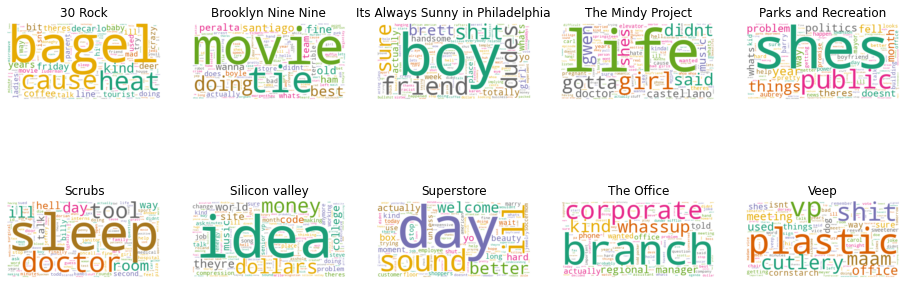

In [22]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

# Create subplots for each comedian
for index, show in enumerate(data.columns):
    wc.generate(data_clean.Script[show])
    
    plt.subplot(2, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_show_names[index])
    
plt.show()

# Word cloud results
Having eliminated most predominant filler words that are not representative of the context, the word clouds provide a great introductory insight into what each show talks about. The pilot episode of a show sets the tone for the show; even though the exact elements of each episode will vary, the nature of those elements will generally remain conistent.
For e.g., 
1. 30 Rock has a lot of discussion surrounding the word "bagel". This is for two reasons: a) the show tries to represent a quitessential element of New York right at the beginning, and b) the word becomes a subject of multiple subsequent jokes and bits, which is typical for the show because of its premise. 
2. In Parks and Recreation, the word "public" comes up often. This is because the titular character is very passionate about her city, and the whole episode revolves around setting up and discussing initiatives for bettering public amenities like parks in the (fictional) city of Pawnee.
3.  Silicon Valley talks about "idea" quite a bit. I think I dont need to explain that much; its perfect for their target audience.
4. However, Superstore's results arent particularly helpful in terms of identifying what the show is about. 
5. The Office talks about "corporate" and "branch" often, which makes sense because the corporate hierarchy of the company is discussed frequently and they talk about the Scranton branch where the premise of the show is set.

Its fascinating to see the premise boiled down to the fundamentals in such simple terms; these shows attempt to tell more than 100 stories in roughly 22 minutes over the several years that they are on the air. And yet, they can be understood simply an elegantly through word clouds!